# Predict Loan Approval 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.
<br>

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [74]:
import numpy as np
import pandas as pd

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
dataset = pd.read_csv('loan_data.csv')

In [77]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


# EDA

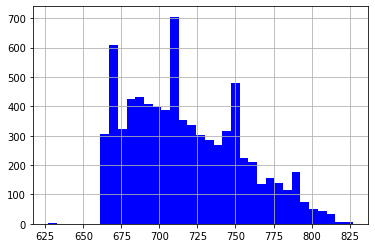

In [79]:
dataset['fico'][dataset['credit.policy']==1].hist(bins=35, color = 'blue')

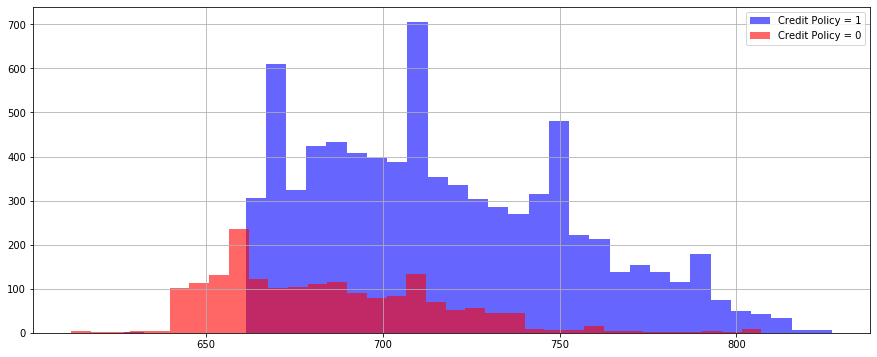

In [80]:

plt.figure(figsize=(15,6))

dataset['fico'][dataset['credit.policy']==1].hist(bins=35, color = 'blue', label = 'Credit Policy = 1', alpha = 0.6)
dataset['fico'][dataset['credit.policy']==0].hist(bins=35, color = 'red', label = 'Credit Policy = 0', alpha = 0.6)
plt.legend()
#plt.xlabel('FICO')
plt.show()

#More people have credit policy = 1 than credit policy = 0
# Fico score less than 660 , didnt meet the credit underwritting criteria

#### debt_consolidation  is the highest chance of not paying fully

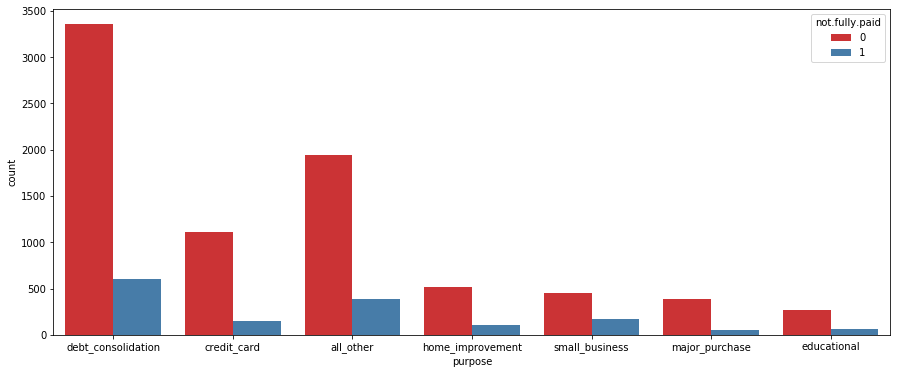

In [81]:

plt.figure(figsize=(15,6))
sns.countplot(x='purpose', hue='not.fully.paid', data = dataset, palette = 'Set1')

#### Let's see the trend between FICO score and interest rate.

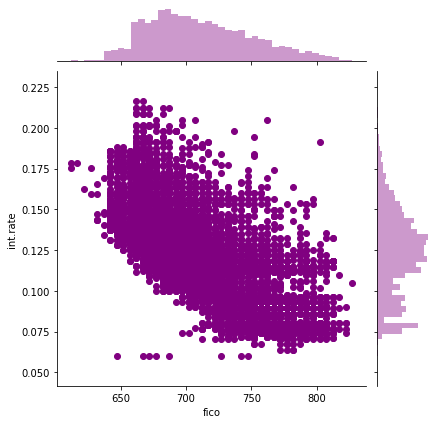

In [82]:
sns.jointplot(x='fico', y='int.rate', data =dataset, color = 'purple')

# If your FICO score decreases then you have worst credit, hence interest rate will increase and vice versa for higher
# fico score

# Data Preprocessing 

### Handling Catagorical values

In [83]:
dataset.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [88]:
cat_col = ['purpose'] #here we can increase the catagorical coloumns

final_dataset = pd.get_dummies(dataset, columns = cat_col , drop_first=True)

In [89]:
final_dataset

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,0,0,0,0,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,0,0,0,0,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,1,0,0,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,1,0,0


# Modelling

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x=final_dataset.drop('not.fully.paid',axis =1)
y=final_dataset['not.fully.paid']

In [92]:
 X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

### Decision Tree

In [95]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
dtree = DecisionTreeClassifier()

In [97]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [98]:
y_pred = dtree.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [100]:
print(confusion_matrix(y_test,y_pred))

[[2014  378]
 [ 370  112]]


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      2392
           1       0.23      0.23      0.23       482

    accuracy                           0.74      2874
   macro avg       0.54      0.54      0.54      2874
weighted avg       0.74      0.74      0.74      2874



### Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rand_for = RandomForestClassifier(n_estimators=200)

In [104]:
rand_for.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_pred_rand = rand_for.predict(X_test)

In [106]:
print(confusion_matrix(y_test,y_pred_rand))

[[2383    9]
 [ 474    8]]


In [107]:
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91      2392
           1       0.47      0.02      0.03       482

    accuracy                           0.83      2874
   macro avg       0.65      0.51      0.47      2874
weighted avg       0.77      0.83      0.76      2874

